In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial
from scipy.special import wofz
import os
os.chdir("../")
from Lineshape import *


In [18]:
# df = pd.read_csv("2024-02-07_18h45m11s-RawSignal.csv",header = None) ### Good event file
# os.chdir("NM4_Fermilab/data")
df = pd.read_csv("2024-07-08_14h08m33s-RawSignal.csv",header = None)

df = df.drop(columns=[0])
x = np.linspace(210,216,500)

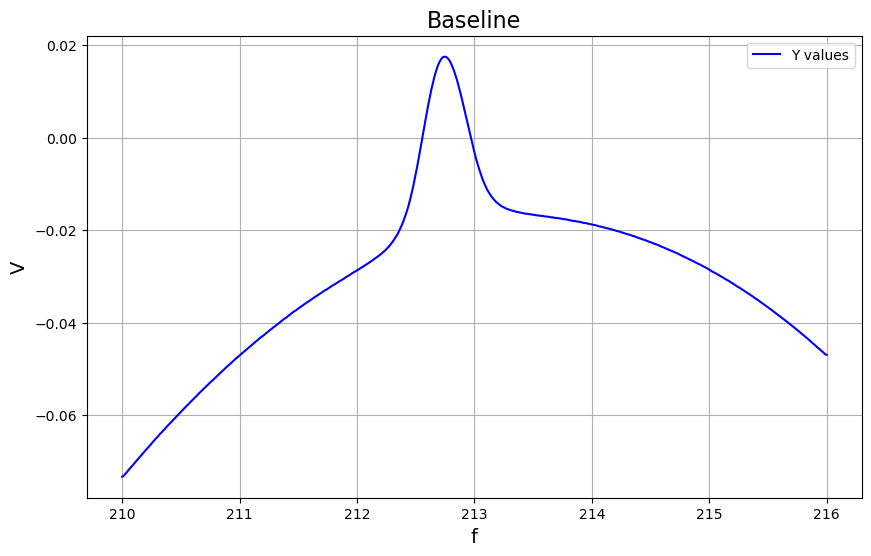

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(x, df.iloc[2], linestyle='-', color='b', label='Y values')
plt.title('Baseline', fontsize=16)
plt.xlabel('f', fontsize=14)
plt.ylabel('V', fontsize=14)
plt.grid(True)
plt.legend()

In [70]:
# df = pd.read_csv("2024-02-07_18h45m11s-RawSignal.csv",header = None) ### Good event file
# os.chdir("NM4_Fermilab/data")
col_names = [f'col_{i}' for i in range(501)] 


df = pd.read_csv("2024-07-11_17h05m01s-RawSignal.csv", 
                 header=None, 
                 names=col_names, 
                 on_bad_lines='skip')

selected_timestamp = '1720584673'  
# selected_timestamp = '1720584614'
selected_row = df[df['col_0'].astype(str).str.strip() == selected_timestamp]

# Ensure that a row is selected
if not selected_row.empty:
    # Remove the first column (timestamp) from the selected row
    selected_row = selected_row.drop(columns=['col_0'])

    # Convert the row into a NumPy array and reshape it to (500,)
    reshaped_row = selected_row.values.reshape(500,)

    # Display the reshaped row
    print("Reshaped row (500,):")
    print(reshaped_row)
else:
    print(f"No matching row found for the timestamp: {selected_timestamp}")

df = df.drop(columns=['col_0'])
df = df.dropna()
x = np.linspace(30,34,500)

Reshaped row (500,):
[-0.03017692 -0.03017134 -0.03016122 -0.03014922 -0.03013928 -0.03012746
 -0.03011514 -0.0301052  -0.03009264 -0.03008204 -0.03007176 -0.03005962
 -0.03004994 -0.03003956 -0.0300281  -0.03001526 -0.03000586 -0.02999444
 -0.02998226 -0.02997208 -0.02996196 -0.02995022 -0.02993858 -0.02992638
 -0.02991552 -0.02990486 -0.02989412 -0.02988378 -0.02987326 -0.0298625
 -0.02985086 -0.02984048 -0.0298304  -0.0298182  -0.02980792 -0.02979606
 -0.02978574 -0.0297764  -0.02976496 -0.0297541  -0.0297422  -0.0297323
 -0.02972086 -0.02970964 -0.02969988 -0.02968996 -0.02967848 -0.02966888
 -0.02965862 -0.02964738 -0.02963628 -0.02962674 -0.02961646 -0.02960434
 -0.02959472 -0.02958638 -0.0295749  -0.02956322 -0.02955274 -0.02954292
 -0.02953338 -0.02952182 -0.02951274 -0.0295031  -0.0294927  -0.029482
 -0.02947294 -0.02946056 -0.02945102 -0.0294411  -0.02942974 -0.02942128
 -0.02941158 -0.0294013  -0.02939008 -0.0293804  -0.0293716  -0.02935968
 -0.02935078 -0.02934126 -0.029331

No handles with labels found to put in legend.


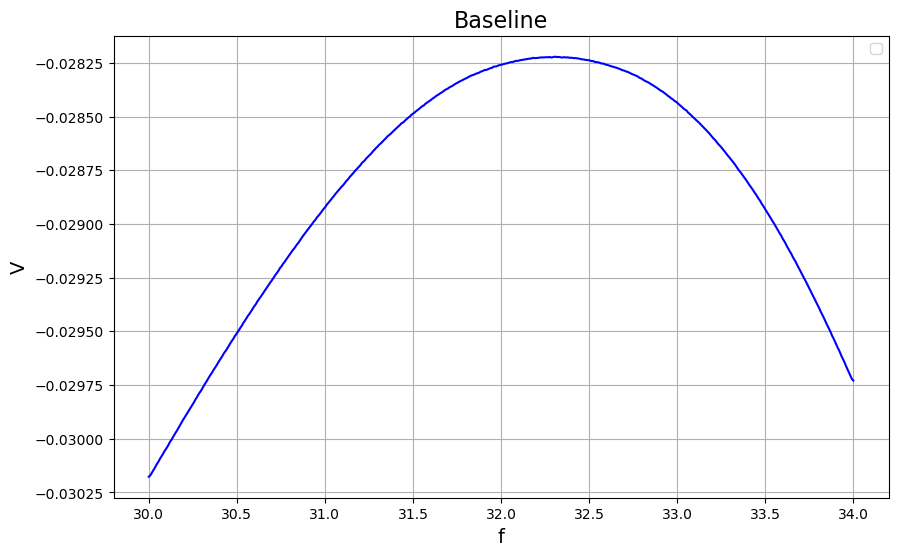

In [71]:
plt.figure(figsize=(10, 6))
plt.plot(x, reshaped_row, linestyle='-', color='b')
plt.title('Baseline', fontsize=16)
plt.xlabel('f', fontsize=14)
plt.ylabel('V', fontsize=14)
plt.grid(True)
plt.legend()

In [29]:
df

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_491,col_492,col_493,col_494,col_495,col_496,col_497,col_498,col_499,col_500
79,-0.004324,-0.003472,-2.753176e-03,-0.002011,-0.001312,-0.000580,0.000143,0.000836,0.001505,0.002230,...,0.001405,0.001566,0.001600,0.001688,0.001818,0.001927,0.002060,0.002164,2.312667e-03,0.002180
85,0.001271,0.001151,9.807601e-04,0.000931,0.000866,0.000787,0.000778,0.000691,0.000705,0.000559,...,-0.000523,-0.000617,-0.000609,-0.000748,-0.000835,-0.000970,-0.001103,-0.001039,-1.107737e-03,-0.001126
86,0.000035,0.000070,-5.015842e-05,0.000052,0.000006,-0.000059,0.000061,-0.000036,0.000056,-0.000018,...,0.000027,-0.000032,0.000047,-0.000003,-0.000057,-0.000051,-0.000042,0.000008,-6.460996e-06,0.000013
87,0.000069,0.000069,-6.273889e-05,-0.000015,-0.000086,-0.000058,0.000031,0.000100,0.000070,0.000027,...,0.000082,0.000126,0.000055,0.000087,-0.000038,-0.000022,-0.000103,-0.000004,-5.675201e-05,-0.000017
88,0.000139,0.000159,-9.616580e-07,0.000024,-0.000051,0.000004,0.000107,0.000092,0.000096,0.000014,...,0.000045,0.000025,0.000050,0.000011,-0.000021,-0.000056,-0.000088,-0.000086,-4.380657e-07,-0.000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13172,-0.000010,-0.000005,-3.282916e-06,-0.000003,-0.000004,-0.000003,-0.000003,-0.000002,-0.000003,-0.000002,...,-0.000002,-0.000003,-0.000004,-0.000003,-0.000004,-0.000006,-0.000007,-0.000006,-7.807206e-06,-0.000016
13173,-0.000010,-0.000004,-2.479252e-06,-0.000003,-0.000004,-0.000004,-0.000004,-0.000002,-0.000002,-0.000002,...,-0.000005,-0.000004,-0.000004,-0.000005,-0.000005,-0.000007,-0.000008,-0.000009,-8.901453e-06,-0.000016
13174,-0.000009,-0.000004,-3.962156e-06,-0.000004,-0.000004,-0.000002,-0.000002,-0.000004,-0.000004,-0.000003,...,-0.000003,-0.000003,-0.000003,-0.000005,-0.000005,-0.000007,-0.000006,-0.000006,-7.378334e-06,-0.000017
13175,-0.000011,-0.000004,-2.515046e-06,-0.000002,-0.000004,-0.000004,-0.000003,-0.000003,-0.000001,-0.000001,...,-0.000003,-0.000003,-0.000004,-0.000004,-0.000004,-0.000006,-0.000007,-0.000007,-6.712898e-06,-0.000015


In [11]:
degree = 2
coefficients = np.polyfit(x, df.iloc[2], degree)
p = np.poly1d(coefficients)


print("Fitted polynomial equation:")
print(p)

Fitted polynomial equation:
           2
-0.001336 x + 0.5688 x - 60.54


In [2]:
"Fitted polynomial equation: -0.001717 x**2 + 0.732 x - 77.99"

'Fitted polynomial equation: -0.001717 x**2 + 0.732 x - 77.99'

In [3]:
def Voigt(x, amp, s, g, x0):
    z = (x - x0 + 1j * g) / (s * np.sqrt(2.0))
    v = wofz(z)  # Faddeeva function for Voigt profile
    out = amp * (np.real(v) / (s * np.sqrt(2 * np.pi)))
    return out

def FrequencyBound(f):
    fit_start_bin, fit_end_bin = 0, 500

    bin_to_freq = 0.0015287  # MHz per bin
    start_freq = f  

    x_full_bins = np.arange(500)  
    x_full_freq = start_freq + x_full_bins * bin_to_freq 

    x_bins = x_full_bins[fit_start_bin:fit_end_bin+1]
    x_freq = x_full_freq[fit_start_bin:fit_end_bin+1]

    return x_full_freq,  x_full_freq[0], x_full_freq[-1]

In [147]:
U = 2.4283e1 + np.random.uniform(-0.01, 0.01)
# U = 0.04283e1 + np.random.uniform(-0.01, 0.01) ## For Deuteron
# Cknob = .0647 + np.random.uniform(-0.005, 0.005)
Cknob = 1.152 ### For Deuteron
cable = 22/2
# eta = 1.04e-2 + np.random.uniform(-0.001, 0.001)
eta = 1.04e-2
# phi = 6.1319 + np.random.uniform(-0.1, 0.1)
phi = 6.1319
Cstray = 10**(-15)
shift = -2.0464e-2 + np.random.uniform(-0.001, 0.001)

sig = 0.1 + np.random.uniform(-0.009, 0.001)       
gam = 0.1 + np.random.uniform(-0.009, 0.001)         
amp = .005 + np.random.uniform(-0.005, 0.01)
center = 213 + np.random.uniform(-.1, .1)

x, lower_bound, upper_bound = FrequencyBound(32.32) ### For Deuteron 
# x = np.linspace(210,216,500)

# signal = Voigt(x, amp, sig, gam, center)
signal = GenerateLineshape(.5)/10
# signal = 0

baseline = Baseline(x, U, Cknob, eta, cable, Cstray, phi, shift)
# baseline = 0
noise = np.random.normal(0, 0.0000002, size=x.shape)
# noise = 0
# baseline = (-0.001717*x**2 + 0.732*x - 77.99) 

combined_signal = signal + baseline

noisy_signal = combined_signal + noise

offset = np.array([x - min(noisy_signal) for x in noisy_signal])

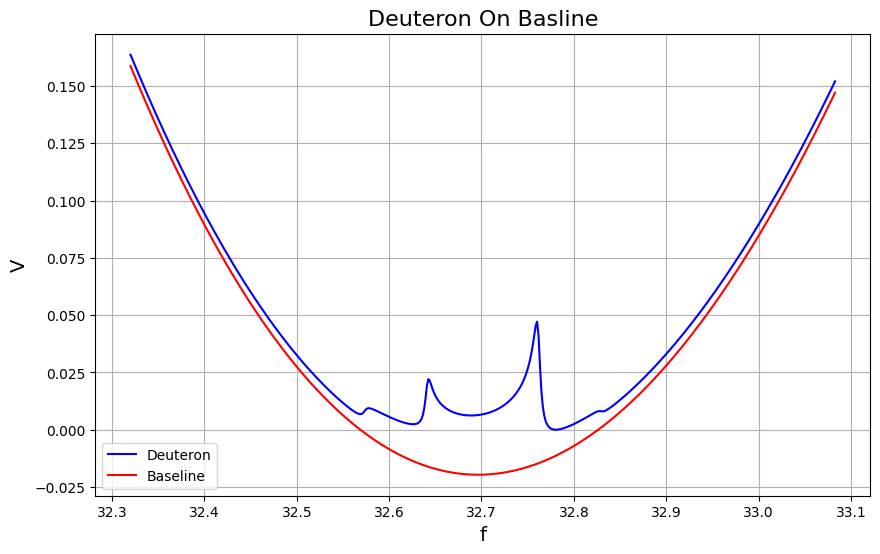

In [149]:
plt.figure(figsize=(10, 6))
plt.plot(x, noisy_signal, linestyle='-', color='b', label = "Deuteron")
plt.plot(x,baseline,linestyle = '-', color = 'r',label = 'Baseline')
plt.title('Deuteron On Basline', fontsize=16)
plt.xlabel('f', fontsize=14)
plt.ylabel('V', fontsize=14)
plt.grid(True)
plt.legend()

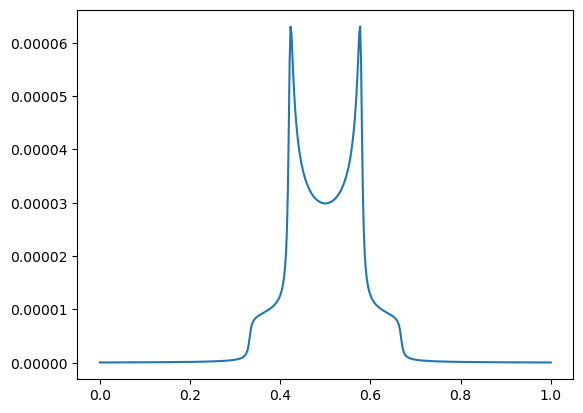

In [171]:
deut = GenerateLineshape(.0005)/10
plt.plot(np.linspace(0,1,500),deut)